# Commercial Bank Customer Retention Prediction

## APSTA-GE.2401: Statistical Consulting

## Scripts

Created on: 12/07/2020

Modified on: 12/07/2020

## Exploratory Data Analysis (EDA)

### Description

This script contains the EDA section of data analysis. 

Data path: `../data/preprocess/`

### Data

The data we imported are: 

- `X_train.csv`: contains all features in Q3 and Q4 of 2020 for training. Imported as `X`.
- `y_train.csv`: contains the label variable for validation. Imported as `y`.
- `X_test.csv`: contains all features in Q1 of 2020 for testing. Imported as `X_true`.

After importing the data, we confirmed that both train sets have the same number of records: **145296**. We also confirmed that the testing set has **76722** records.

### Research Design

The strategy of supervised learning is to train models using the `X_train` data and validate model performance using the `y_train` data. After training, we fit the model to the `X_test` data. The model will then generate predictions, `y_test`, based on `X_test`. 

To increase model performance, we splited the train set into two sets: 80% of the train data goes to the `X_train` set and 20% of the data goes to the `X_test` set. Then, we conducted a 5-fold cross validation and selected the best performed model output. We also find tuned hyperparameters using randomized search.

### Details on EDA



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('SUCCESS! All modules are imported.')

SUCCESS! All modules are imported.


In [2]:
X = pd.read_csv('../data/preprocess/X_train.csv')
y = pd.read_csv('../data/preprocess/y_train.csv')
X_true = pd.read_csv('../data/preprocess/X_test.csv')

In [3]:
print('The proprocessed training set has {} rows and {} columns.'.format(X.shape[0], X.shape[1]))
print('The proprocessed validation set has {} rows and {} columns.'.format(y.shape[0], y.shape[1]))
print('The proprocessed testing set has {} rows and {} columns.'.format(X_true.shape[0], X_true.shape[1]))

The proprocessed training set has 145296 rows and 56 columns.
The proprocessed validation set has 145296 rows and 2 columns.
The proprocessed testing set has 76722 rows and 56 columns.


----

## Features

We first inspected the feature set. 

1. There are 55 features in the feature set. 
2. We checked the correlation among features and the label. 
2. We checked if there are any missing values in the set. We found multiple columns that contain missing values, ranging from 0.005% to 100%. For columns containing a large portion of missing values, we dropped the column to reduce computational burden. For columns containing a small portion of missing values, we applied a deep learning library, [Datawig](https://github.com/awslabs/datawig), which learns machine learning models using deep neural networks to impute missing values in the data.

### Dimensions

In [4]:
X.head().transpose()

,0,1,2,3,4
cust_no,0xb2d640a6,0xb2d4dd44,0xb2d69fef,0xb2d42c89,0xb2d90b58
X1,51000,0,20000,0,0
X2,0,0,0,0,0
X3,256.54,208.51,3265.03,1.41,13.38
X4,0,0,0,0,0
X5,0,0,0,333.01,0
X6,0,0,0,0,0
X7,0,0,0,0,0
X8,0,0,200000,0,0
B1,1,0,0,23,0


In [5]:
print('There are {} columns in the feature set.'.format(X.shape[1]))
X.columns

There are 56 columns in the feature set.


Index(['cust_no', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'B1', 'B2',
       'B3', 'B4', 'B5', 'B6', 'B7', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7',
       'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17',
       'E18', 'C1', 'C2', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9',
       'I10', 'I11', 'I12', 'I13', 'I14', 'I15', 'I16', 'I17', 'I18', 'I19',
       'I20'],
      dtype='object')

### Correlation

In [7]:
Xfull = X.merge(y, how='left', on='cust_no')
corrMatrix = Xfull.corr()

             X1        X2        X3        X4        X5        X6        X7  \
X1     1.000000  0.005947  0.087400  0.135825  0.047085  0.026768 -0.020788   
X2     0.005947  1.000000  0.024128 -0.000376 -0.000436 -0.000356  0.000172   
X3     0.087400  0.024128  1.000000  0.095219  0.004804  0.002218  0.018379   
X4     0.135825 -0.000376  0.095219  1.000000  0.004209  0.087443 -0.019531   
X5     0.047085 -0.000436  0.004804  0.004209  1.000000  0.013113 -0.003162   
X6     0.026768 -0.000356  0.002218  0.087443  0.013113  1.000000  0.003916   
X7    -0.020788  0.000172  0.018379 -0.019531 -0.003162  0.003916  1.000000   
X8     0.062559  0.000809  0.009438  0.059941  0.021386  0.030770 -0.029499   
B1     0.035436  0.003604  0.012487  0.061107  0.019811  0.020996 -0.052079   
B2     0.013314  0.001172  0.020453  0.012528  0.014029  0.011325  0.010874   
B3     0.190557  0.034059  0.208994  0.047553  0.051831  0.050334  0.010824   
B4     0.009941  0.000712  0.014528  0.013015  0.010

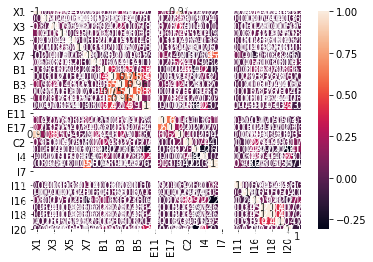

In [8]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [64]:
# Check missing values
missing_val = X.isnull().sum()
for index in missing_val.index:
    if missing_val[index] > 0:
        print('{} has {} missing values. ({:.2%})'.format(index, missing_val[index], missing_val[index]/len(X)))

B6 has 8878 missing values. (6.11%)
E2 has 6370 missing values. (4.38%)
E3 has 6370 missing values. (4.38%)
E4 has 84483 missing values. (58.15%)
E5 has 55129 missing values. (37.94%)
E6 has 7538 missing values. (5.19%)
E7 has 142402 missing values. (98.01%)
E8 has 127381 missing values. (87.67%)
E9 has 145227 missing values. (99.95%)
E10 has 816 missing values. (0.56%)
E11 has 145296 missing values. (100.00%)
E12 has 121324 missing values. (83.50%)
E13 has 127502 missing values. (87.75%)
E14 has 90010 missing values. (61.95%)
E16 has 68530 missing values. (47.17%)
E18 has 62147 missing values. (42.77%)
C1 has 7 missing values. (0.00%)
C2 has 7 missing values. (0.00%)
I1 has 64 missing values. (0.04%)
I5 has 11604 missing values. (7.99%)
I9 has 145296 missing values. (100.00%)
I10 has 128487 missing values. (88.43%)
I13 has 143108 missing values. (98.49%)
I14 has 129650 missing values. (89.23%)


In [62]:
X_original = X.copy()

In [ ]:
# Drop columns with large portion of missing values
col_to_drop = ['E7', 'E8', 'E9']